The goal is to learn something about exoplanets and their host stars through a sample.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats

In [13]:
pd.set_option('display.max_columns', None)

In [14]:
# Function to get rid of outliers

def outliers_removal(df : pd.DataFrame, column : str):

    if df[column].dtype in ['int64', 'float64']:

        q1 = df[column].quantile(.25)
        q3 = df[column].quantile(.75)
        IQR = q3 -q1

        condition = (df[column] < (q1 - 1.5 * IQR)) | (df[column]> (q3 + 1.5 * IQR))

        df_cleaned = df[~condition]

        df_cleaned = df_cleaned.reset_index(drop=True)
    
    else:
        print('Column is not numerical')
        df_cleaned = df
        pass

    return df_cleaned

In [15]:
def summary_stats(df):
    mean_val = df.mean(axis=0, numeric_only=True)
    median_val = df.median(axis=0, numeric_only=True)
    mode_val = df.mode(axis=0, numeric_only=True).iloc[0] 
    variance_val = df.var(axis=0, numeric_only=True)
    std_dev_val = df.std(axis=0, numeric_only=True)
    skew_val = df.skew(axis=0, numeric_only=True)
    kurt_val = df.kurt(axis=0, numeric_only=True)

    stats_df = pd.DataFrame({
        'Mean': mean_val,
        'Median': median_val,
        'Mode': mode_val,
        'Variance': variance_val,
        'Standard Deviation': std_dev_val,
        'Skewness': skew_val,
        'Kurtosis': kurt_val
    })

    stats_df = stats_df.T

    print('Empirical Statistics\n')
    display(stats_df)

Stats on PHL data

In [16]:
df = pd.read_csv('data/phl_data.csv') 

In [19]:
df.columns

Index(['P_NAME', 'P_DETECTION', 'P_TYPE_TEMP', 'P_TYPE', 'S_NAME', 'S_TYPE',
       'S_CONSTELLATION', 'P_MASS', 'P_RADIUS', 'P_YEAR', 'P_PERIOD',
       'P_SEMI_MAJOR_AXIS', 'P_ECCENTRICITY', 'P_INCLINATION',
       'P_IMPACT_PARAMETER', 'P_ESI', 'P_HABITABLE', 'P_HABZONE_CON',
       'P_HABZONE_OPT', 'P_FLUX', 'P_DISTANCE', 'P_DENSITY', 'P_GRAVITY',
       'S_RA', 'S_DEC', 'S_MAG', 'S_DISTANCE', 'S_METALLICITY', 'S_MASS',
       'S_RADIUS', 'S_AGE', 'S_TEMPERATURE', 'S_LUMINOSITY',
       'high_multiplanetary', 'hip_name', 'hd_name', 'matched'],
      dtype='object')

In [20]:
# Adding Earth, Jupiter and Sun values

df.loc[5221] = ['Earth', np.nan,
              'Warm', 'Terran', 'Sun', 
              'G2V', np.nan, 1, 1, np.nan, 
              362.25, 1, 0.0167, 7.155, np.nan,
              1, 1, 1, 1, 1, 1, 5.514, 
              1, 286.125, 63.667, -26.74, 0, 0.015,
              1, 1, 4.6, 5778, 1, True, np.nan, np.nan, np.nan]
df.loc[5222] = ['Jupiter', np.nan, np.nan, 'Gas',
              'Sun', 'G2V', np.nan,  317.8, 11.209, np.nan,
              4332.59, 5.2, 0.00489, 1.303, np.nan, 0, 0, 0,
              0, np.nan, 5.2, 1.326, 2.528, 
              286.125, 63.667, -26.74, 0, 0.015,
              1, 1, 4.6, 5778, 1, True, np.nan,np.nan, np.nan]

In [21]:
# Summary descriptive statistics for each variable

summary_stats(df)

Empirical Statistics



,P_MASS,P_RADIUS,P_YEAR,P_PERIOD,P_SEMI_MAJOR_AXIS,P_ECCENTRICITY,P_INCLINATION,P_IMPACT_PARAMETER,P_ESI,P_HABITABLE,P_HABZONE_CON,P_HABZONE_OPT,P_FLUX,P_DISTANCE,P_DENSITY,P_GRAVITY,S_RA,S_DEC,S_MAG,S_DISTANCE,S_METALLICITY,S_MASS,S_RADIUS,S_AGE,S_TEMPERATURE,S_LUMINOSITY,hip_name,hd_name
Mean,4.561217e+02,5.625688,2015.691762,8.370983e+04,6.981575,0.072867,87.046011,0.424646,0.256817,0.019341,0.033895,0.047300,8.787253e+02,6.701106,0.777465,3.417186,238.747579,20.617758,12.677697,657.508784,0.009630,0.962443,1.527983,4.351611,5.450768e+03,7.741398,5.685511e+04,1.082893e+05
Median,8.295311e+00,2.735240,2016.000000,1.163593e+01,0.102700,0.000000,88.780000,0.380000,0.268255,0.000000,0.000000,0.000000,6.863565e+01,0.101600,0.472030,1.158017,286.554525,40.238636,13.548500,421.382000,0.020000,0.950000,0.960000,3.980000,5.561000e+03,0.870964,5.660600e+04,1.038325e+05
Mode,2.329679e+00,13.339900,2016.000000,2.731000e+02,0.060000,0.000000,89.990000,0.410000,0.000000,0.000000,0.000000,0.000000,4.644008e+01,0.051000,0.761213,1.132393,284.433460,49.305124,8.970000,848.254000,0.000000,0.940000,0.860000,4.370000,5.600000e+03,0.690240,7.599000e+03,1.018000e+04
Variance,1.438281e+07,28.296774,18.400660,3.210044e+13,19288.592667,0.022255,99.990134,0.127268,0.017014,0.033910,0.032752,0.045071,3.233153e+08,18307.646748,16.454864,108.344002,8030.103895,1213.744222,10.265515,941056.968460,0.033184,0.202551,15.198760,9.299486,3.287896e+06,12306.986856,1.224576e+09,5.720150e+09
Standard Deviation,3.792468e+03,5.319471,4.289599,5.665725e+06,138.883378,0.149180,9.999507,0.356746,0.130436,0.184148,0.180976,0.212300,1.798097e+04,135.305753,4.056460,10.408843,89.610847,34.838832,3.203984,970.080908,0.182166,0.450057,3.898559,3.049506,1.813256e+03,110.936860,3.499394e+04,7.563167e+04
Skewness,5.053447e+01,1.421897,-1.155677,7.090009e+01,39.255912,2.731624,-2.783453,8.764249,1.020493,9.962769,5.152976,4.266357,3.886104e+01,40.249964,43.951931,13.128680,-1.234507,-1.003715,-1.221505,4.559542,-0.624414,8.535462,13.503854,1.214448,1.550934e+01,42.126645,7.612347e-02,3.985997e-01
Kurtosis,3.094152e+03,5.877410,2.650417,5.030451e+03,1871.439146,8.228456,37.002905,233.912576,3.067460,100.633333,24.562570,16.208012,1.621382e+03,1969.441014,2278.498008,281.483967,0.232765,-0.119495,10.832152,25.748120,1.596527,156.906335,246.381433,1.559824,3.495353e+02,2179.931732,-1.226480e+00,-5.627426e-01


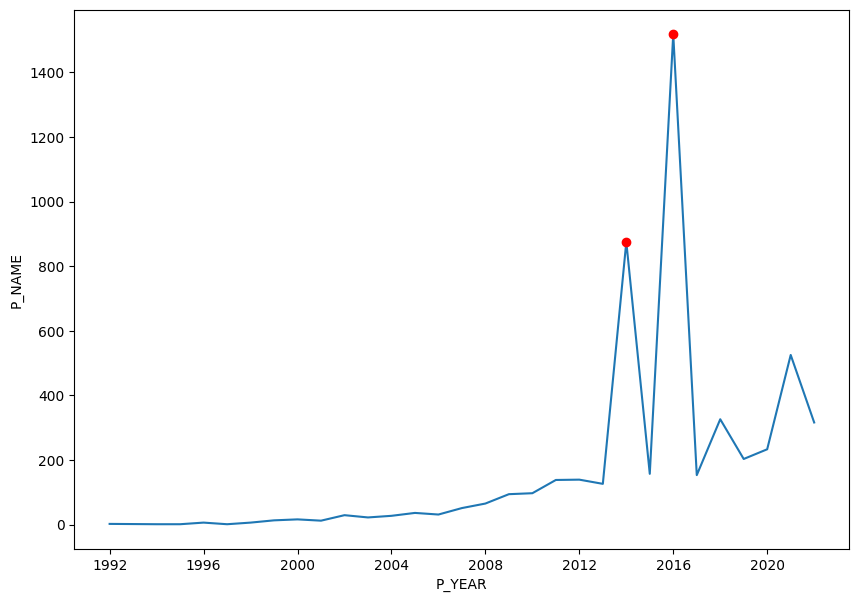

In [22]:
# Growth of discoveries over time

df['P_YEAR'] = pd.to_datetime(df['P_YEAR'], format='%Y')

fig = plt.figure(figsize=(10,7))

g=sns.lineplot(pd.DataFrame(df.groupby('P_YEAR').count()).reset_index(), x = 'P_YEAR', y = 'P_NAME')
g.plot(df.groupby('P_YEAR').count().reset_index().nlargest(2, columns='P_NAME')['P_YEAR'].iloc[0], 
       df.groupby('P_YEAR').count().reset_index().nlargest(2, columns='P_NAME')['P_NAME'].iloc[0], 'ro')
g.plot(df.groupby('P_YEAR').count().reset_index().nlargest(2, columns='P_NAME')['P_YEAR'].iloc[1], 
       df.groupby('P_YEAR').count().reset_index().nlargest(2, columns='P_NAME')['P_NAME'].iloc[1], 'ro')

Two big peaks in 2014 and 2016. Why ?

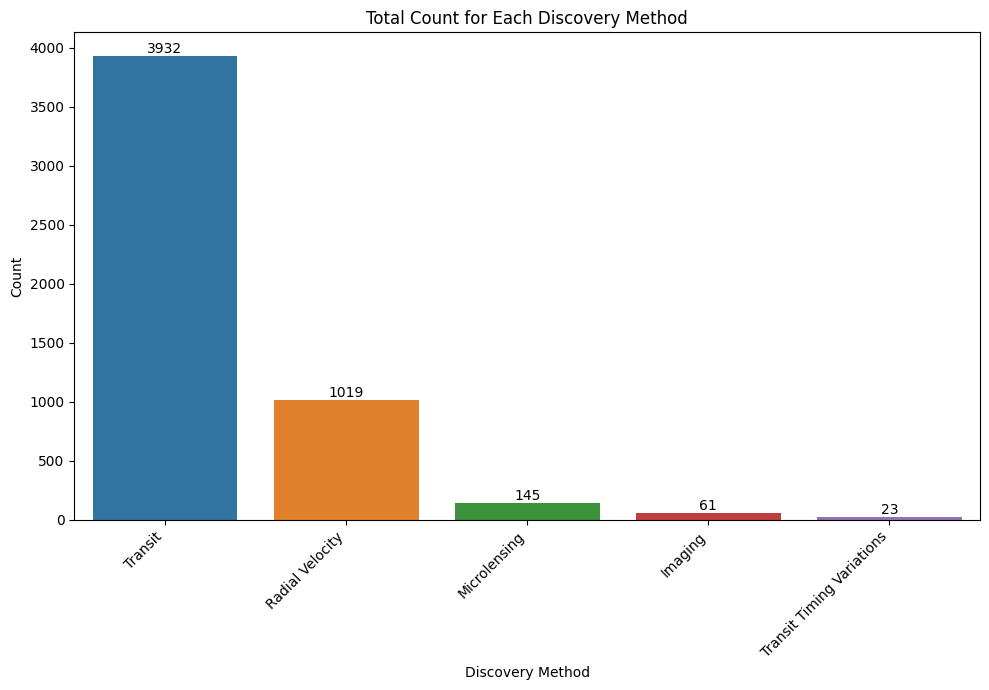

In [23]:
## How were planets discovered ? (Method, telescope), w.r.t to the years of discovery

total_counts = df['P_DETECTION'].value_counts().reset_index()
total_counts.columns = ['P_DETECTION', 'count']

top_discovery_methods = total_counts.head(5)['P_DETECTION'].values

fig, ax1 = plt.subplots(figsize=(10, 7))  

sns.barplot(data=total_counts, x='P_DETECTION', y='count', ax=ax1, order=top_discovery_methods)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
ax1.set_title('Total Count for Each Discovery Method')
ax1.set_ylabel('Count')
ax1.set_xlabel('Discovery Method')
ax1.bar_label(ax1.containers[0])

plt.tight_layout()
plt.show()

In [24]:
print(f'{(df[df["P_DETECTION"]=="Transit"]["P_NAME"][:5520].count()/df[:5520].shape[0])*100:.1f}% of planets have been discovered through the Transit method.')

75.3% of planets have been discovered through the Transit method.


Let's firstly focus on discovered exoplanets

In [25]:
# Filter outliers and store each filtered daatsets in a dictionary

cleaned_series = {}

for column in df.columns:
    if column in df.drop(['P_NAME', 'P_YEAR', 'P_DETECTION', 'P_ESI', 'P_HABITABLE', 'P_TYPE_TEMP', 'P_HABZONE_CON', 'P_HABZONE_OPT', 'P_TYPE', 'S_NAME', 'S_RA', 'S_DEC', 'S_TYPE', 'hip_name', 'hd_name', 'matched'], axis = 1).columns:
        cleaned_series['df_cleaned_pl_{0}'.format(column)] = outliers_removal(df, column)

Column is not numerical
Column is not numerical


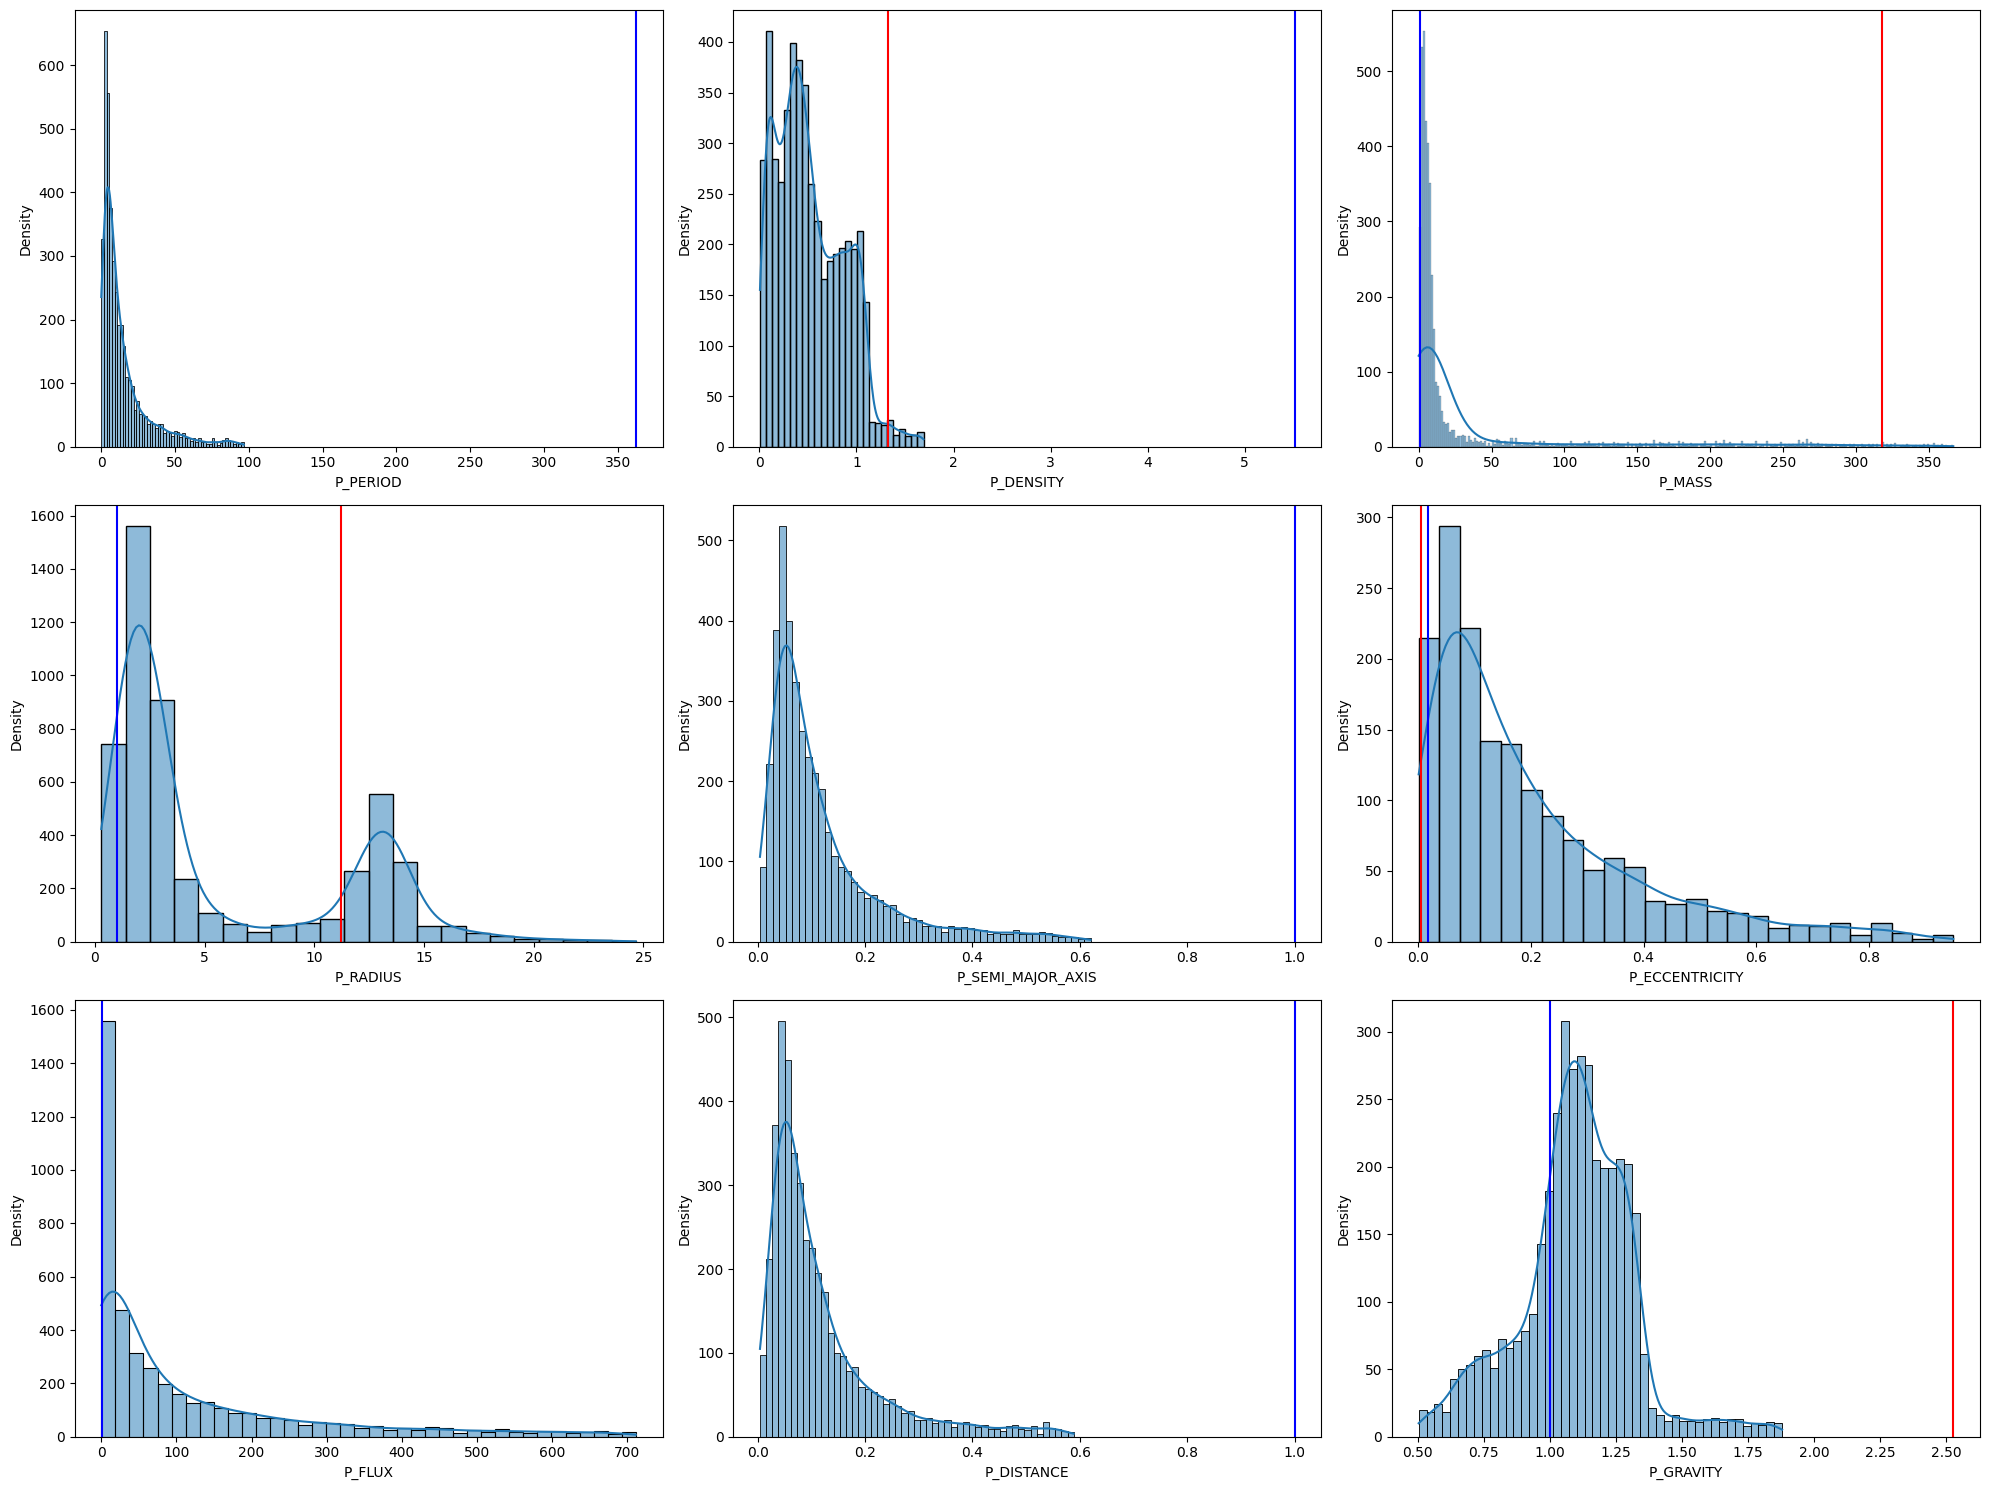

In [26]:
# Histograms of important variables (planets)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(20, 15))
sns.histplot(data=cleaned_series['df_cleaned_pl_P_PERIOD'], x='P_PERIOD', kde=True,  ax=ax1) 
ax1.axvline(df[df['P_NAME']=='Earth']['P_PERIOD'].iloc[0], color = 'blue')
sns.histplot(data=cleaned_series['df_cleaned_pl_P_DENSITY'], x='P_DENSITY', kde=True, ax=ax2) 
ax2.axvline(df[df['P_NAME']=='Earth']['P_DENSITY'].iloc[0], color = 'blue')
ax2.axvline(df[df['P_NAME']=='Jupiter']['P_DENSITY'].iloc[0], color = 'red')
sns.histplot(data=cleaned_series['df_cleaned_pl_P_MASS'], x='P_MASS', kde=True, ax=ax3) 
ax3.axvline(df[df['P_NAME']=='Earth']['P_MASS'].iloc[0], color = 'blue')
ax3.axvline(df[df['P_NAME']=='Jupiter']['P_MASS'].iloc[0], color = 'red')
sns.histplot(data=cleaned_series['df_cleaned_pl_P_RADIUS'], x='P_RADIUS', kde=True, ax=ax4) 
ax4.axvline(df[df['P_NAME']=='Earth']['P_RADIUS'].iloc[0], color = 'blue')
ax4.axvline(df[df['P_NAME']=='Jupiter']['P_RADIUS'].iloc[0], color = 'red')
sns.histplot(data=cleaned_series['df_cleaned_pl_P_SEMI_MAJOR_AXIS'], x='P_SEMI_MAJOR_AXIS', kde=True, ax=ax5) 
ax5.axvline(df[df['P_NAME']=='Earth']['P_SEMI_MAJOR_AXIS'].iloc[0], color = 'blue')
sns.histplot(data=df[df['P_ECCENTRICITY']>0], x='P_ECCENTRICITY', kde=True, ax=ax6) 
ax6.axvline(df[df['P_NAME']=='Earth']['P_ECCENTRICITY'].iloc[0], color = 'blue')
ax6.axvline(df[df['P_NAME']=='Jupiter']['P_ECCENTRICITY'].iloc[0], color = 'red')
sns.histplot(data=cleaned_series['df_cleaned_pl_P_FLUX'], x='P_FLUX', kde=True, ax=ax7) 
ax7.axvline(df[df['P_NAME']=='Earth']['P_FLUX'].iloc[0], color = 'blue')
ax7.axvline(df[df['P_NAME']=='Jupiter']['P_FLUX'].iloc[0], color = 'red')
sns.histplot(data=cleaned_series['df_cleaned_pl_P_DISTANCE'], x='P_DISTANCE', kde=True, ax=ax8) 
ax8.axvline(df[df['P_NAME']=='Earth']['P_DISTANCE'].iloc[0], color = 'blue')
sns.histplot(data=cleaned_series['df_cleaned_pl_P_GRAVITY'], x='P_GRAVITY', kde=True, ax=ax9) 
ax9.axvline(df[df['P_NAME']=='Earth']['P_GRAVITY'].iloc[0], color = 'blue')
ax9.axvline(df[df['P_NAME']=='Jupiter']['P_GRAVITY'].iloc[0], color = 'red')

xlabels = ['P_PERIOD', 'P_DENSITY', 'P_MASS', 'P_RADIUS', 'P_SEMI_MAJOR_AXIS', 'P_ECCENTRICITY', 'P_FLUX', 'P_DISTANCE', 'P_GRAVITY']

for ax in fig.get_axes():
    ax.spines['left']
    ax.spines['bottom']
    ax.set_ylabel('Density')
    ax_idx = fig.get_axes().index(ax)
    ax.set_xlabel(xlabels[ax_idx])

plt.tight_layout()
plt.show()

Let's focus a bit on the distribution of the Mass across planets. Even after getting rid of outliers, we obtain a right heavy-tailed distribution. The histogram and kernel density do not tell us much about it. Therefore, let's, firstly, decide if this is a power law or not, by looking at the descending ecdf with logarithmic x and y axis.

<AxesSubplot: xlabel='P_MASS', ylabel='Proportion'>

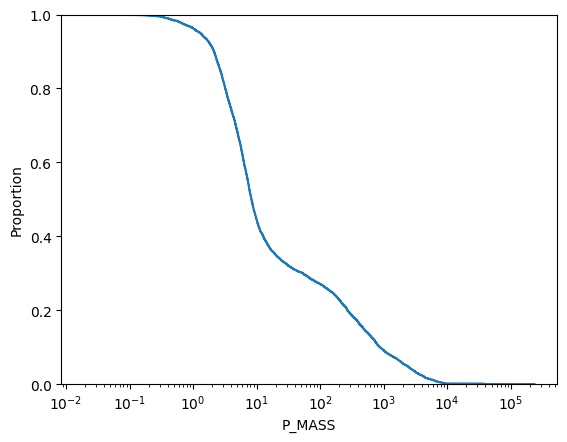

In [28]:
sns.ecdfplot(data=df, x='P_MASS', log_scale=True, complementary=True) 

A power law appears as a perfect straight line. This is not the case here. Therefore, we can log_transform the column and visualize the resulting distribution.

<AxesSubplot: xlabel='P_MASS', ylabel='Count'>

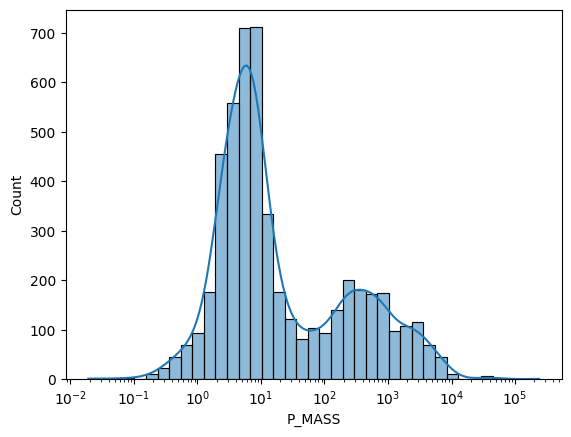

In [29]:
sns.histplot(data=df, x='P_MASS', kde=True, log_scale=True) 

Comments : 

We may wish to understand if variables follow a exponential distribution (namely normal one) or a power law (pareto one) or a log normal distribution. For that, let's plot the q-q plots for each, fitting to a normal distribution, a pareto distribution and a log normal distribution (by log transforming the data and comparing the results to a normal distribution).

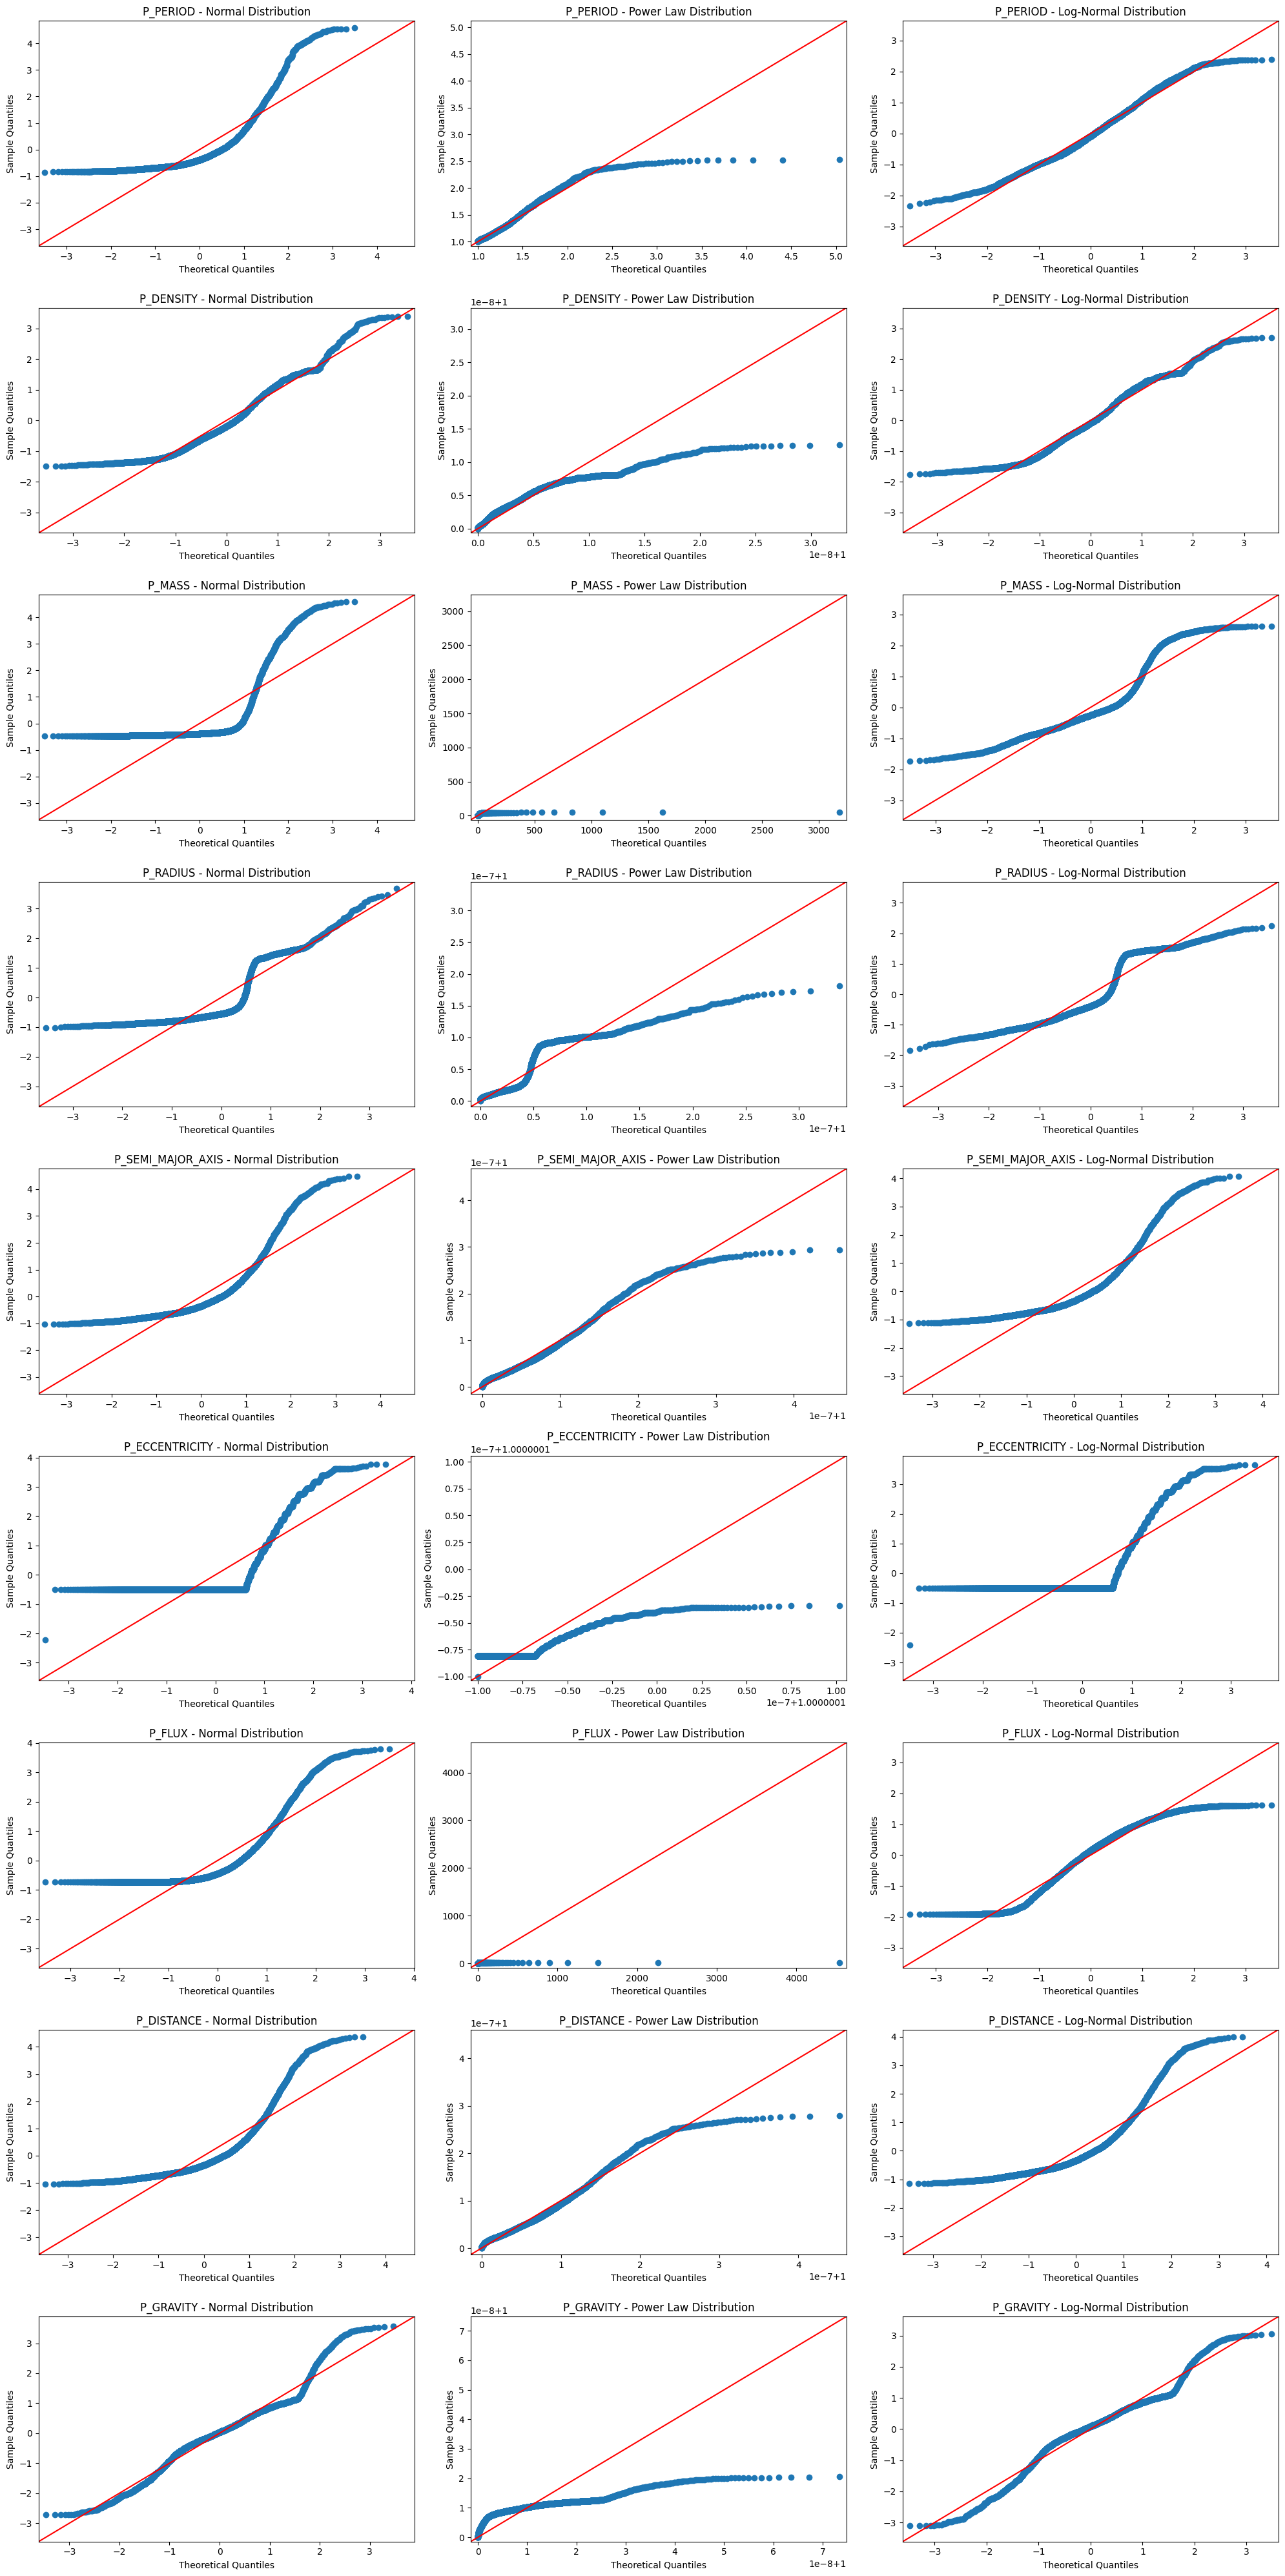

In [30]:
fig, axes = plt.subplots(9, 3, figsize=(20, 40))

columns_to_plot = ['P_PERIOD', 'P_DENSITY', 'P_MASS', 'P_RADIUS', 'P_SEMI_MAJOR_AXIS', 'P_ECCENTRICITY', 'P_FLUX', 'P_DISTANCE', 'P_GRAVITY']

for i, col_name in enumerate(columns_to_plot):
    df_name = f'df_cleaned_pl_{col_name}'

    data = cleaned_series[df_name][col_name].dropna()
    data = data[np.isfinite(data)]

    sm.qqplot(data, stats.norm, line='45', fit=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'{col_name} - Normal Distribution')
    axes[i, 0].set_xlabel('Theoretical Quantiles')
    axes[i, 0].set_ylabel('Sample Quantiles')

    sm.qqplot(data, stats.pareto, line='45', fit=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'{col_name} - Power Law Distribution')
    axes[i, 1].set_xlabel('Theoretical Quantiles')

    logged_data = np.log(data + 1)
    logged_data = logged_data[np.isfinite(logged_data)]
    sm.qqplot(logged_data, stats.norm, line='45', fit=True, ax=axes[i, 2])
    axes[i, 2].set_title(f'{col_name} - Log-Normal Distribution')
    axes[i, 2].set_xlabel('Theoretical Quantiles')

plt.tight_layout()
plt.show()

Comments : 

Take a look at the distribution of the ESI index, telling us about the habitability of a planet.

<AxesSubplot: xlabel='P_ESI', ylabel='Count'>

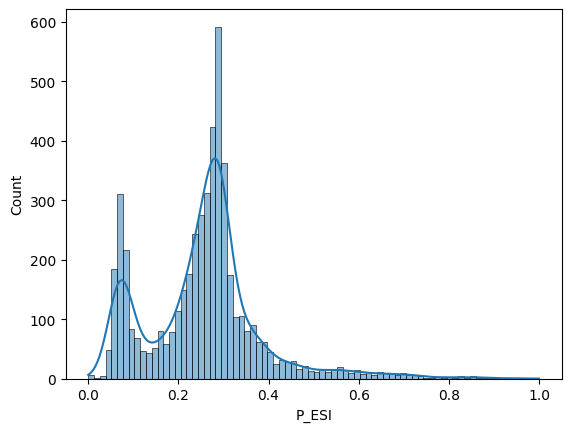

In [31]:
sns.histplot(data=df, x='P_ESI', kde=True) 

Two gaussian distributions, and a heavy tail. Check the Q-Q plot with different distributions.

Text(0.5, 0, 'Theoretical Quantiles')

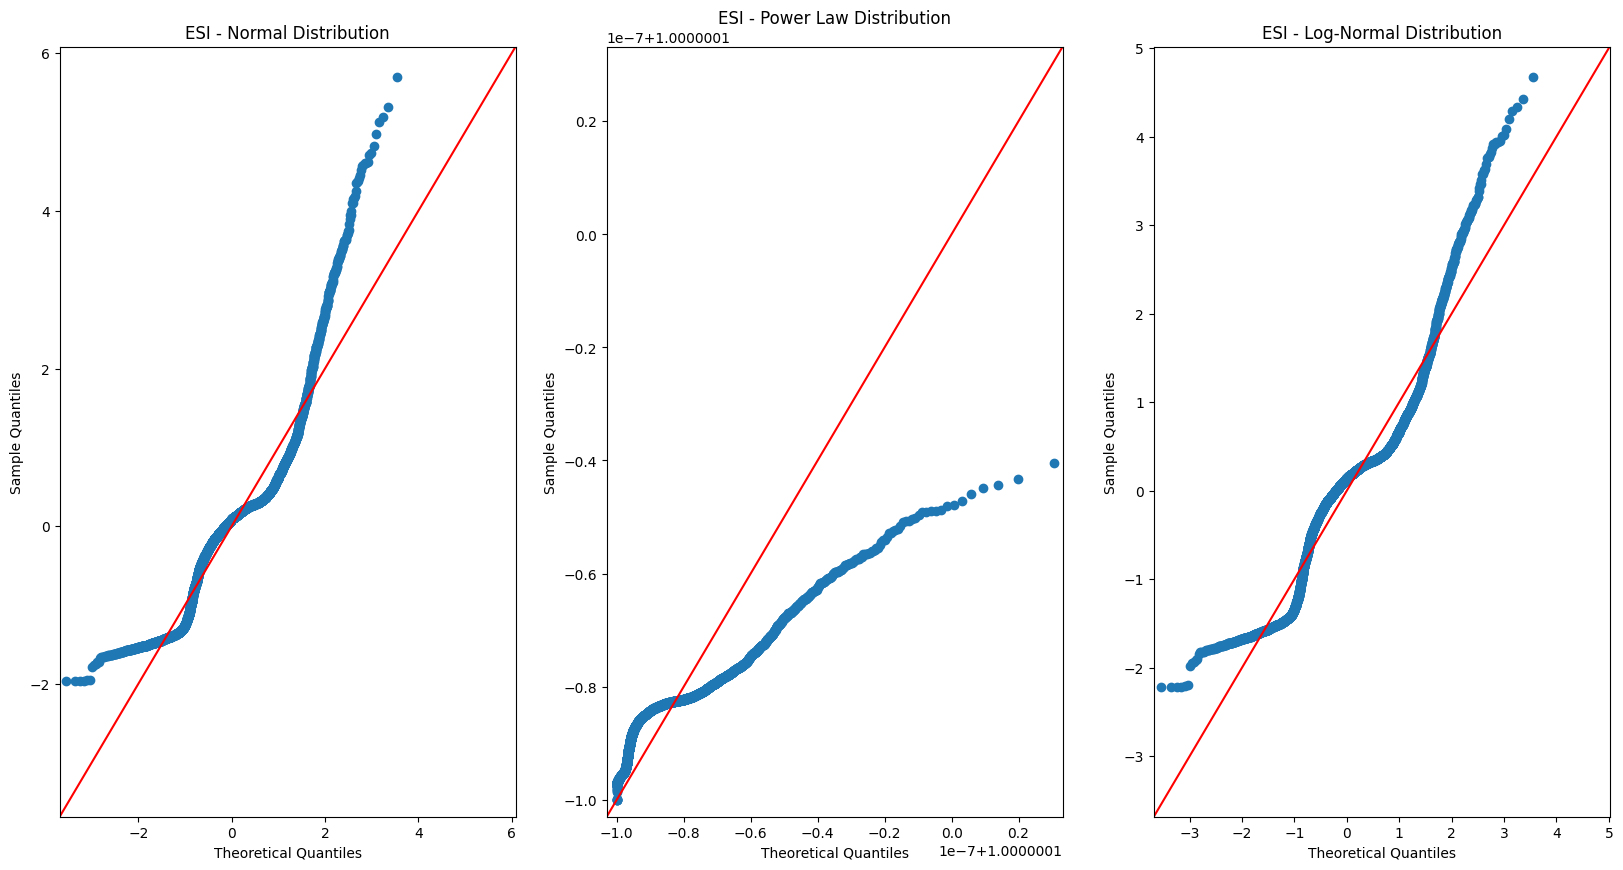

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

sm.qqplot(df['P_ESI'].dropna(), stats.norm, line='45', fit=True, ax=ax1)
ax1.set_title('ESI - Normal Distribution')
ax1.set_xlabel('Theoretical Quantiles')
ax1.set_ylabel('Sample Quantiles')
sm.qqplot(df['P_ESI'].dropna(), stats.pareto, line='45', fit=True, ax=ax2)
ax2.set_title('ESI - Power Law Distribution')
ax2.set_xlabel('Theoretical Quantiles')
logged_data = np.log(df['P_ESI'] + 1)
sm.qqplot(logged_data.dropna(), stats.norm, line='45', fit=True, ax=ax3)
ax3.set_title('ESI - Log-Normal Distribution')
ax3.set_xlabel('Theoretical Quantiles')

Comments :

Let's take a look at boxplots, to visualize uncertainty in our dataset.

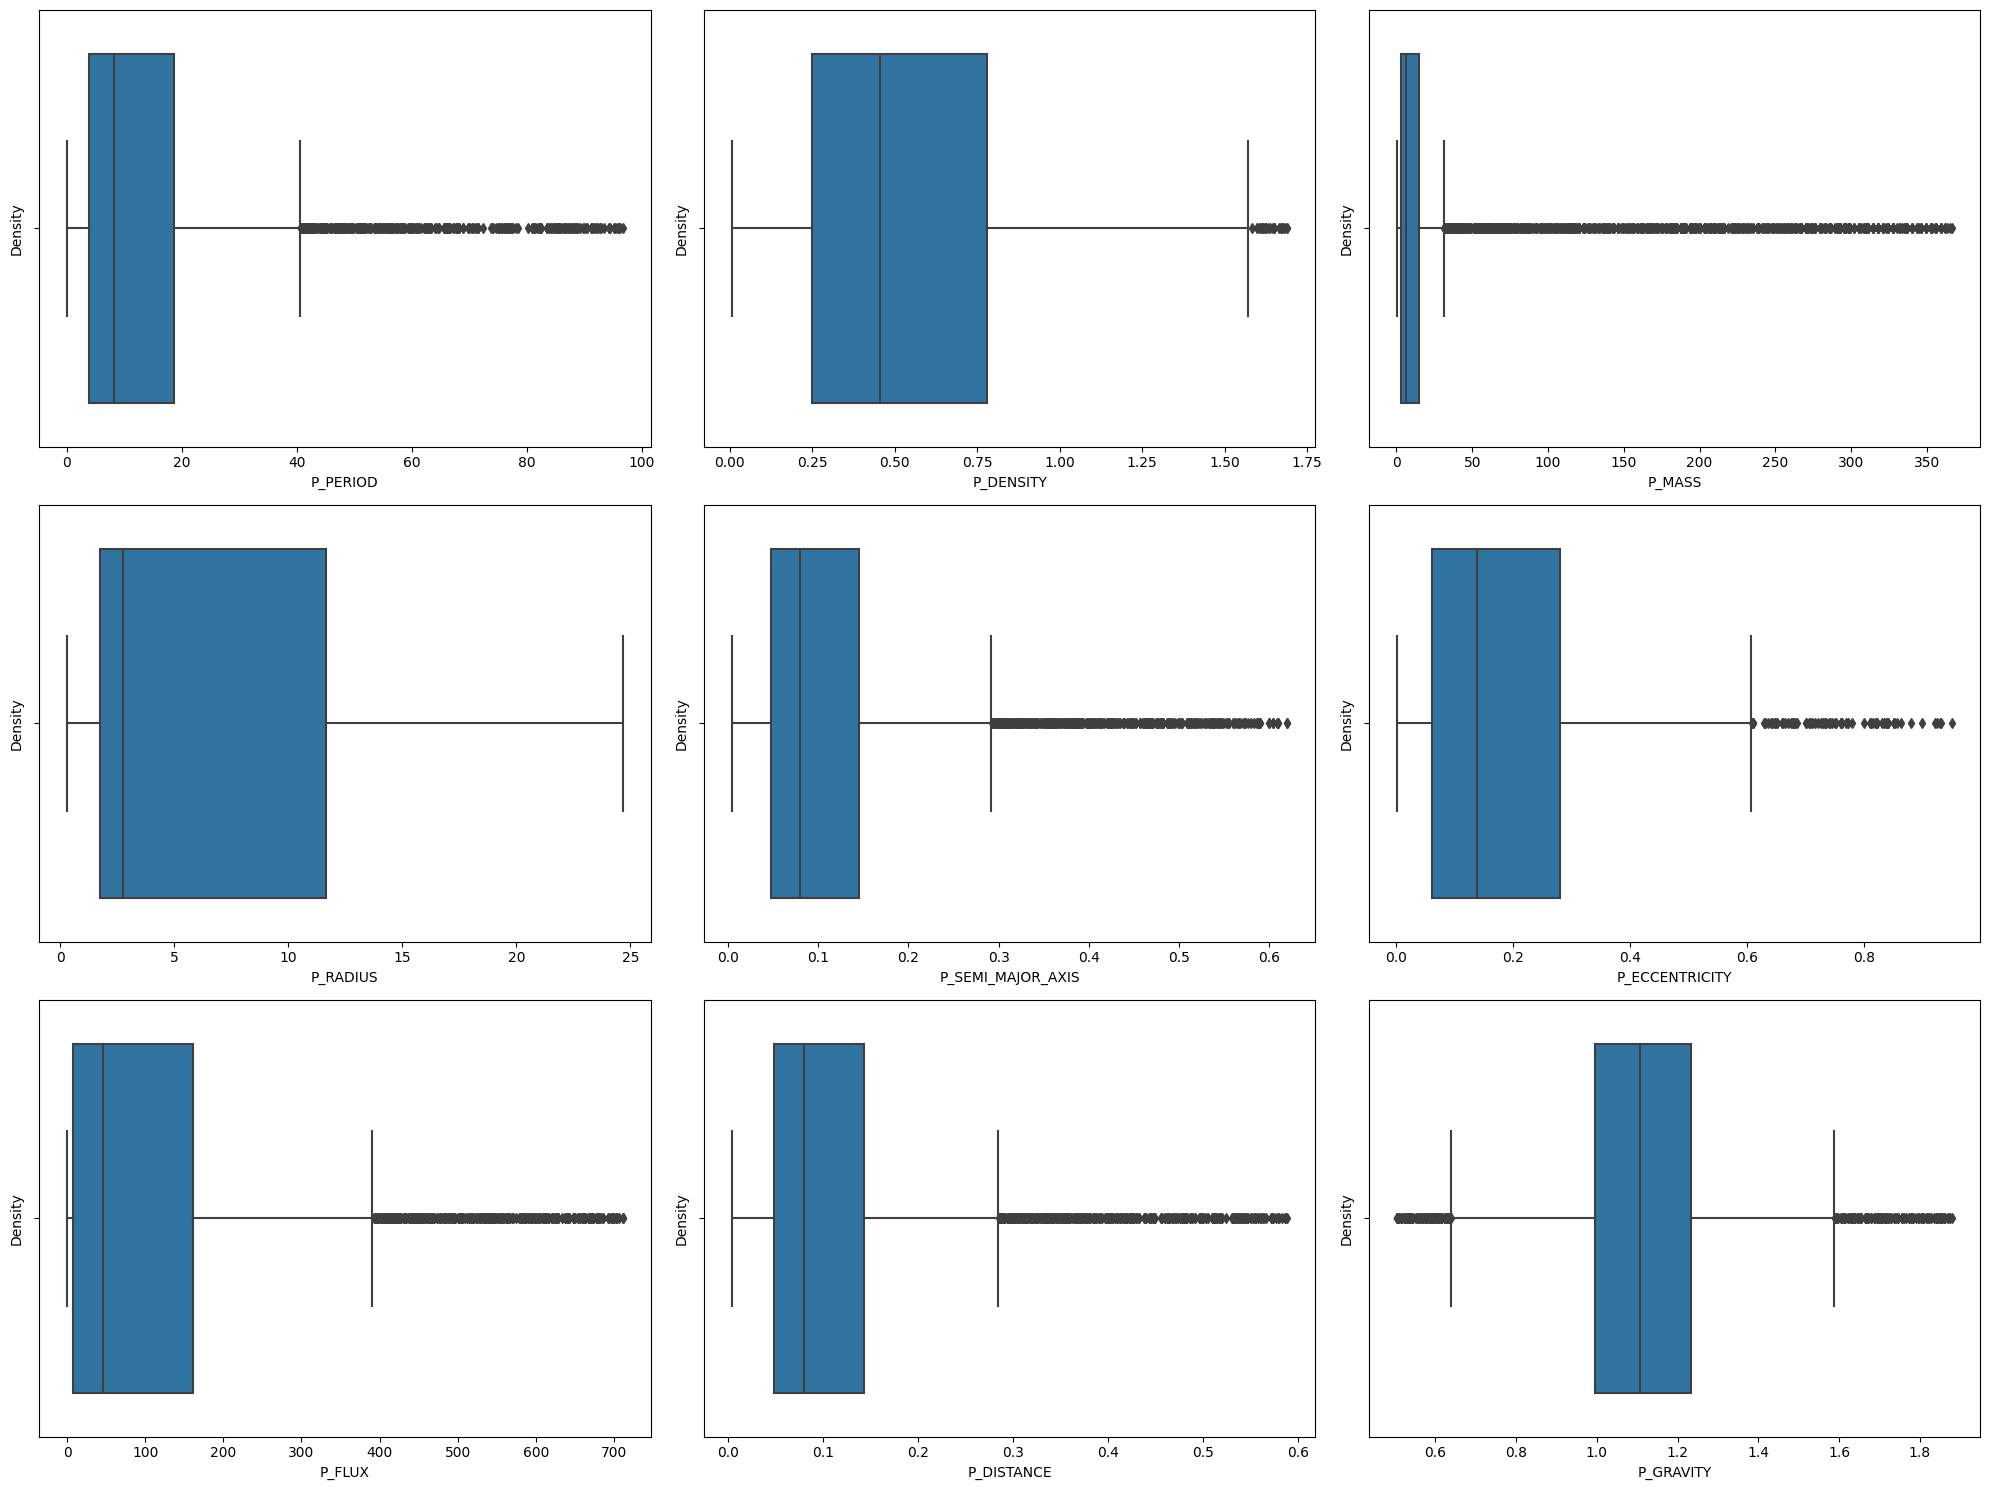

In [33]:
# Histograms of important variables

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(20, 15))
sns.boxplot(data=cleaned_series['df_cleaned_pl_P_PERIOD'], x='P_PERIOD', ax=ax1) 
sns.boxplot(data=cleaned_series['df_cleaned_pl_P_DENSITY'], x='P_DENSITY', ax=ax2) 
sns.boxplot(data=cleaned_series['df_cleaned_pl_P_MASS'], x='P_MASS', ax=ax3) 
sns.boxplot(data=cleaned_series['df_cleaned_pl_P_RADIUS'], x='P_RADIUS', ax=ax4) 
sns.boxplot(data=cleaned_series['df_cleaned_pl_P_SEMI_MAJOR_AXIS'], x='P_SEMI_MAJOR_AXIS', ax=ax5) 
sns.boxplot(data=df[df['P_ECCENTRICITY']>0], x='P_ECCENTRICITY', ax=ax6) 
sns.boxplot(data=cleaned_series['df_cleaned_pl_P_FLUX'], x='P_FLUX', ax=ax7) 
sns.boxplot(data=cleaned_series['df_cleaned_pl_P_DISTANCE'], x='P_DISTANCE', ax=ax8) 
sns.boxplot(data=cleaned_series['df_cleaned_pl_P_GRAVITY'], x='P_GRAVITY', ax=ax9) 

xlabels = ['P_PERIOD', 'P_DENSITY', 'P_MASS', 'P_RADIUS', 'P_SEMI_MAJOR_AXIS', 'P_ECCENTRICITY', 'P_FLUX', 'P_DISTANCE', 'P_GRAVITY']

for ax in fig.get_axes():
    ax.spines['left']
    ax.spines['bottom']
    ax.set_ylabel('Density')
    ax_idx = fig.get_axes().index(ax)
    ax.set_xlabel(xlabels[ax_idx])

plt.tight_layout()
plt.show()

Let's now focus on host stars

IndexError: list index out of range

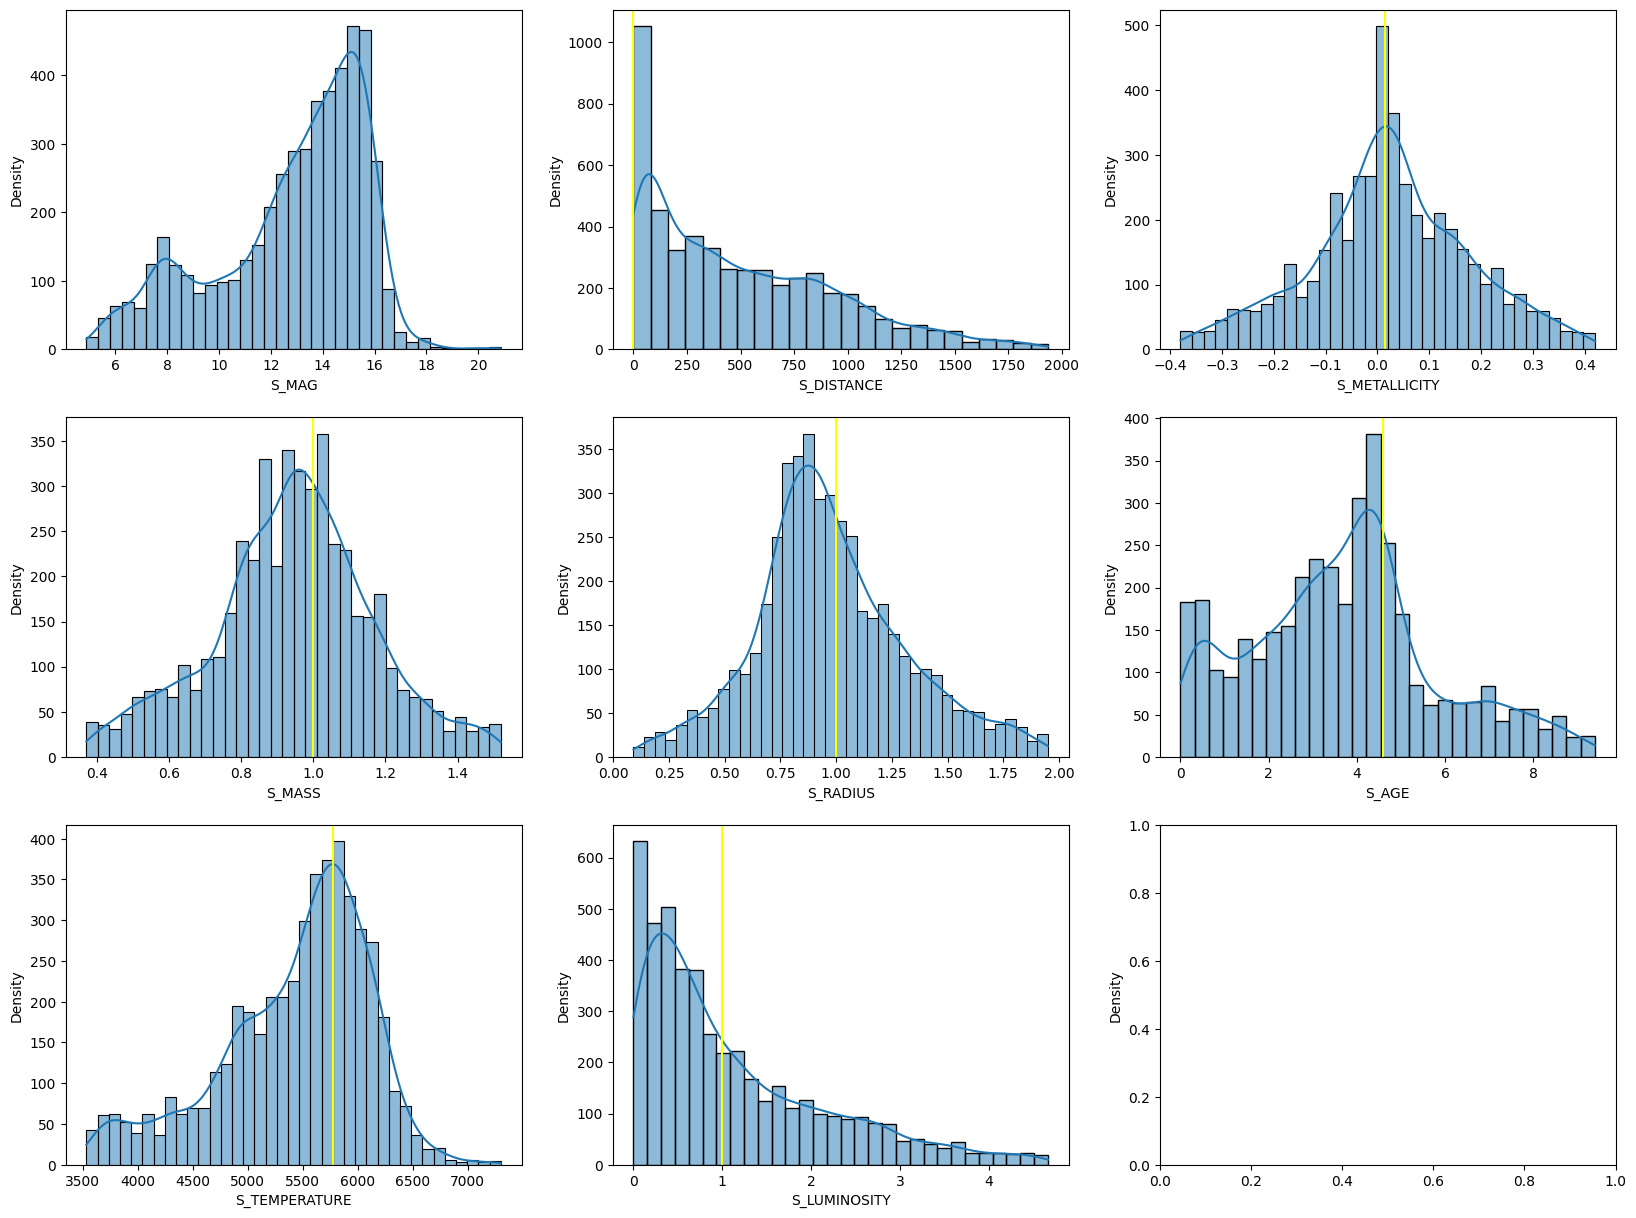

In [34]:
# Histograms of important variables (stars)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(20, 15))
sns.histplot(data=cleaned_series['df_cleaned_pl_S_MAG'], x='S_MAG', kde=True,  ax=ax1) 
sns.histplot(data=cleaned_series['df_cleaned_pl_S_DISTANCE'], x='S_DISTANCE', kde=True, ax=ax2) 
ax2.axvline(df[df['P_NAME']=='Earth']['S_DISTANCE'].iloc[0], color = 'yellow')
sns.histplot(data=cleaned_series['df_cleaned_pl_S_METALLICITY'], x='S_METALLICITY', kde=True, ax=ax3) 
ax3.axvline(df[df['P_NAME']=='Earth']['S_METALLICITY'].iloc[0], color = 'yellow')
sns.histplot(data=cleaned_series['df_cleaned_pl_S_MASS'], x='S_MASS', kde=True, ax=ax4) 
ax4.axvline(df[df['P_NAME']=='Earth']['S_MASS'].iloc[0], color = 'yellow')
sns.histplot(data=cleaned_series['df_cleaned_pl_S_RADIUS'], x='S_RADIUS', kde=True, ax=ax5) 
ax5.axvline(df[df['P_NAME']=='Earth']['S_RADIUS'].iloc[0], color = 'yellow')
sns.histplot(data=cleaned_series['df_cleaned_pl_S_AGE'], x='S_AGE', kde=True, ax=ax6) 
ax6.axvline(df[df['P_NAME']=='Earth']['S_AGE'].iloc[0], color = 'yellow')
sns.histplot(data=cleaned_series['df_cleaned_pl_S_TEMPERATURE'], x='S_TEMPERATURE', kde=True, ax=ax7) 
ax7.axvline(df[df['P_NAME']=='Earth']['S_TEMPERATURE'].iloc[0], color = 'yellow')
sns.histplot(data=cleaned_series['df_cleaned_pl_S_LUMINOSITY'], x='S_LUMINOSITY', kde=True, ax=ax8) 
ax8.axvline(df[df['P_NAME']=='Earth']['S_LUMINOSITY'].iloc[0], color = 'yellow')

xlabels = ['S_MAG', 'S_DISTANCE', 'S_METALLICITY', 'S_MASS', 'S_RADIUS', 'S_AGE', 'S_TEMPERATURE', 'S_LUMINOSITY']

for ax in fig.get_axes():
    ax.spines['left']
    ax.spines['bottom']
    ax.set_ylabel('Density')
    ax_idx = fig.get_axes().index(ax)
    ax.set_xlabel(xlabels[ax_idx])

plt.tight_layout()
plt.show()

Distributions of host star variables seem to be much more like normal distribution. Let's check using the q-q plots for the three distributions.

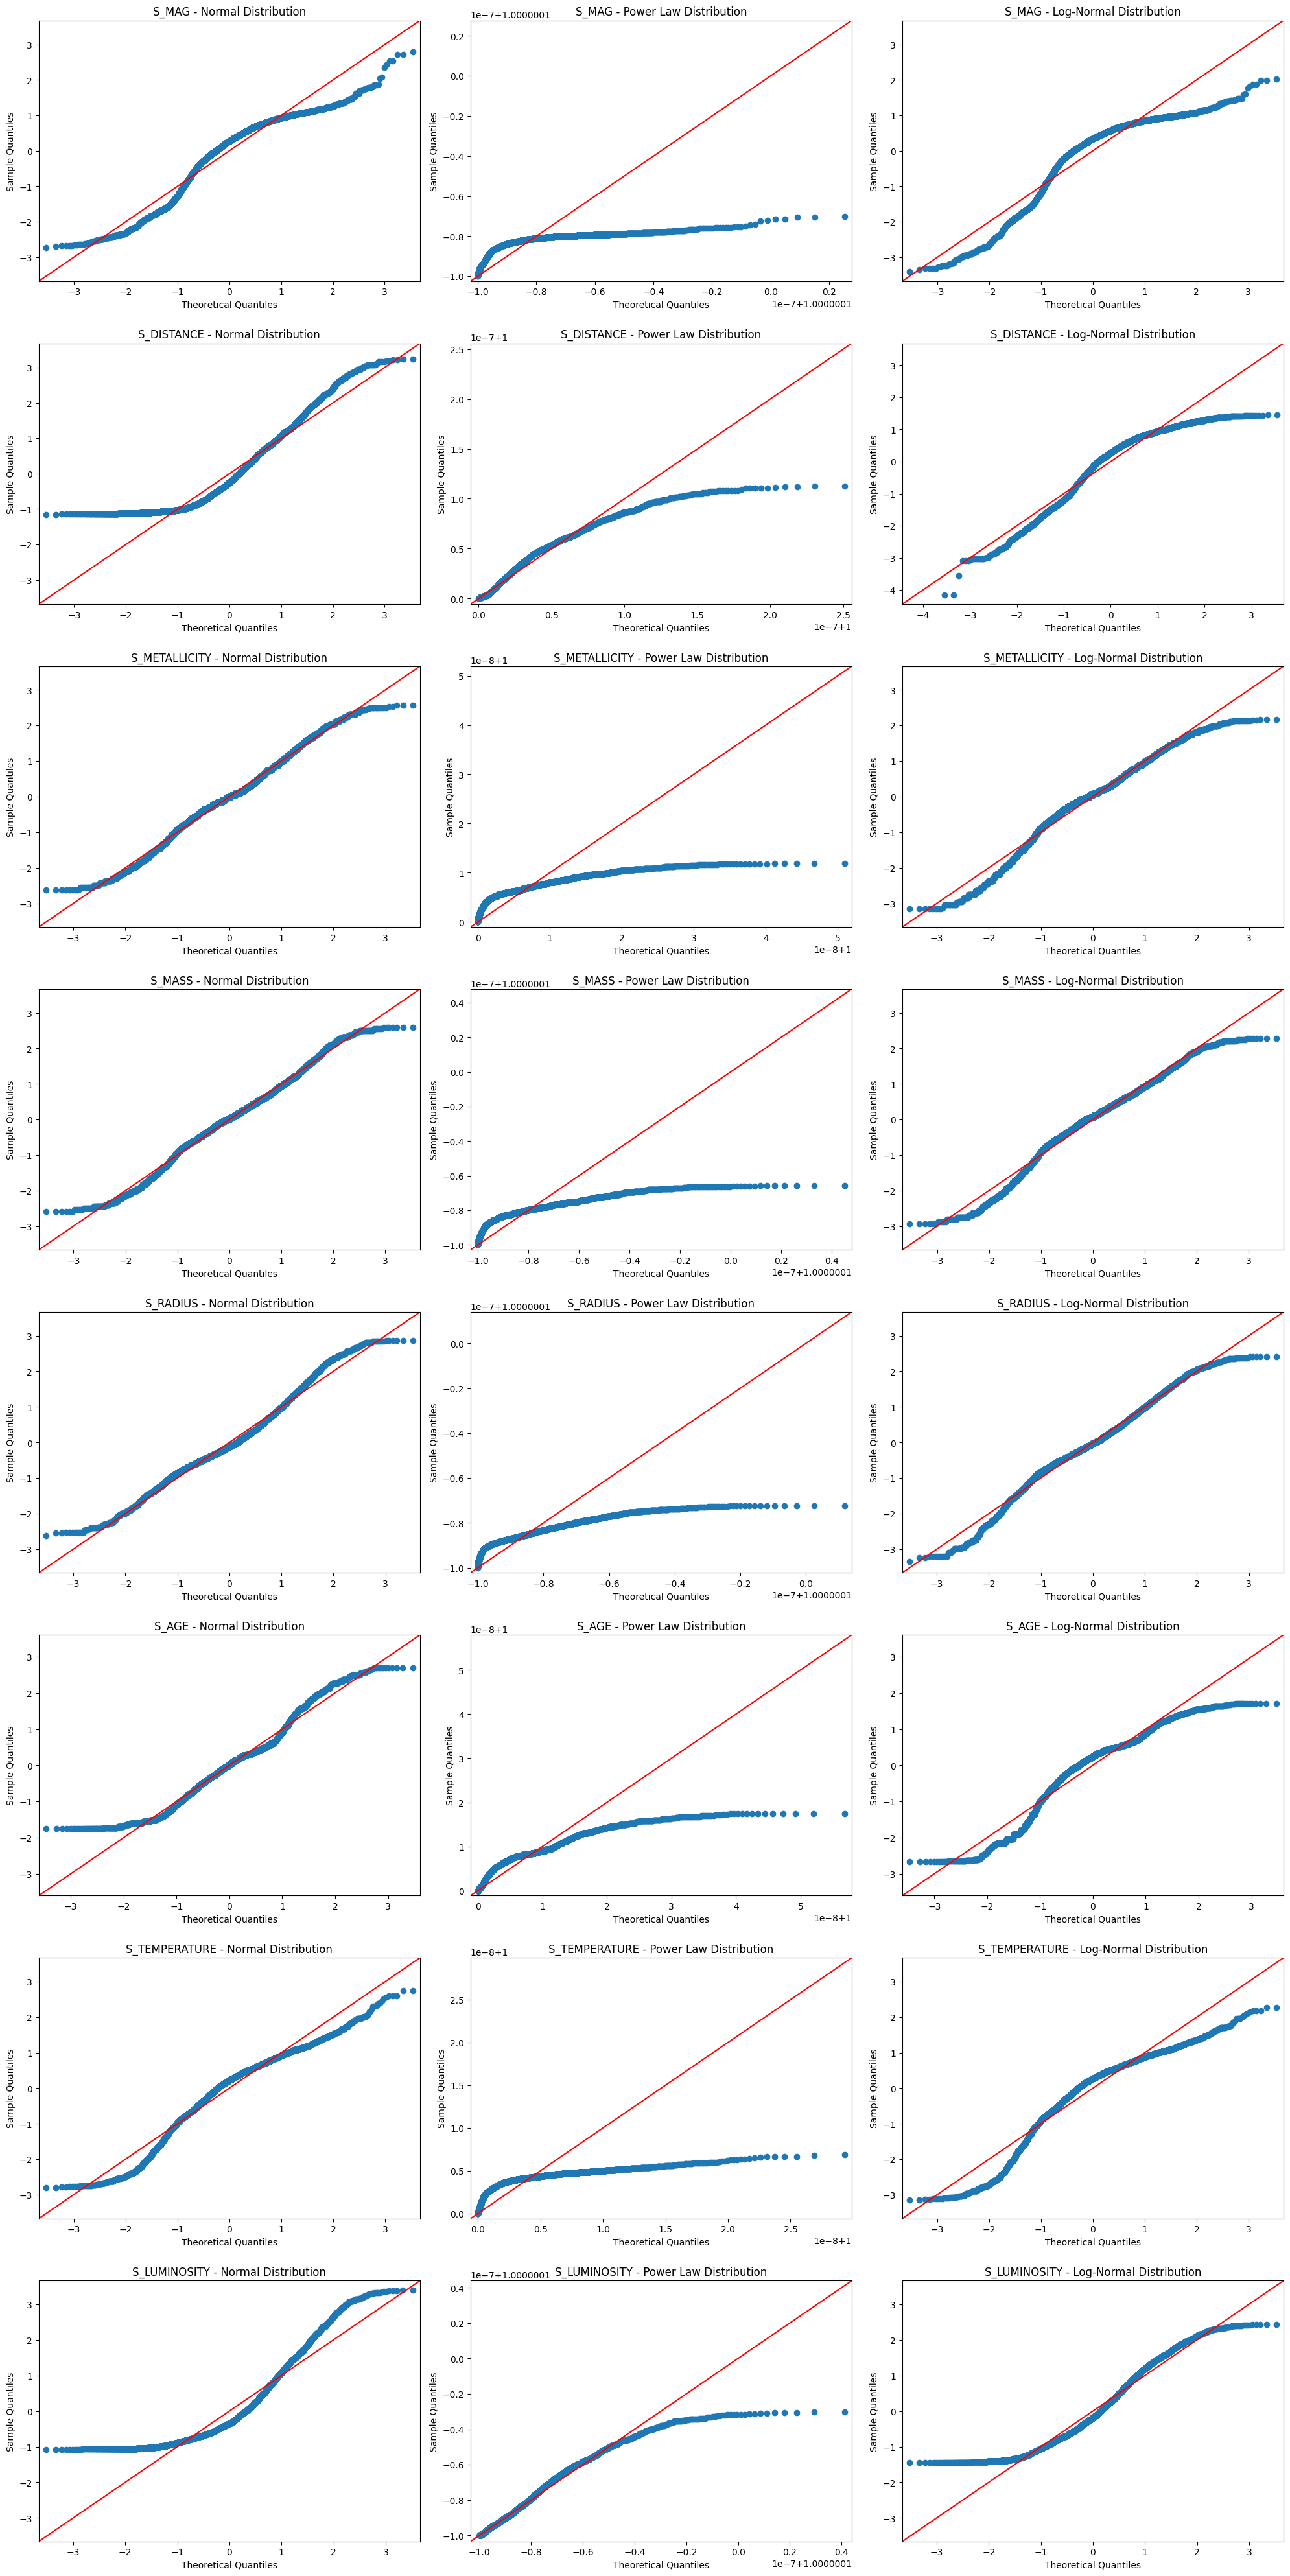

In [35]:
fig, axes = plt.subplots(8, 3, figsize=(20, 40))

columns_to_plot = ['S_MAG', 'S_DISTANCE', 'S_METALLICITY', 'S_MASS', 'S_RADIUS', 'S_AGE', 'S_TEMPERATURE', 'S_LUMINOSITY']


for i, col_name in enumerate(columns_to_plot):
    df_name = f'df_cleaned_pl_{col_name}'

    data = cleaned_series[df_name][col_name].dropna()
    data = data[np.isfinite(data)]

    sm.qqplot(data, stats.norm, line='45', fit=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'{col_name} - Normal Distribution')
    axes[i, 0].set_xlabel('Theoretical Quantiles')
    axes[i, 0].set_ylabel('Sample Quantiles')

    sm.qqplot(data, stats.pareto, line='45', fit=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'{col_name} - Power Law Distribution')
    axes[i, 1].set_xlabel('Theoretical Quantiles')

    logged_data = np.log(data + 1)
    logged_data = logged_data[np.isfinite(logged_data)]
    sm.qqplot(logged_data, stats.norm, line='45', fit=True, ax=axes[i, 2])
    axes[i, 2].set_title(f'{col_name} - Log-Normal Distribution')
    axes[i, 2].set_xlabel('Theoretical Quantiles')

plt.tight_layout()
plt.show()

Let's take a look at boxplots

IndexError: list index out of range

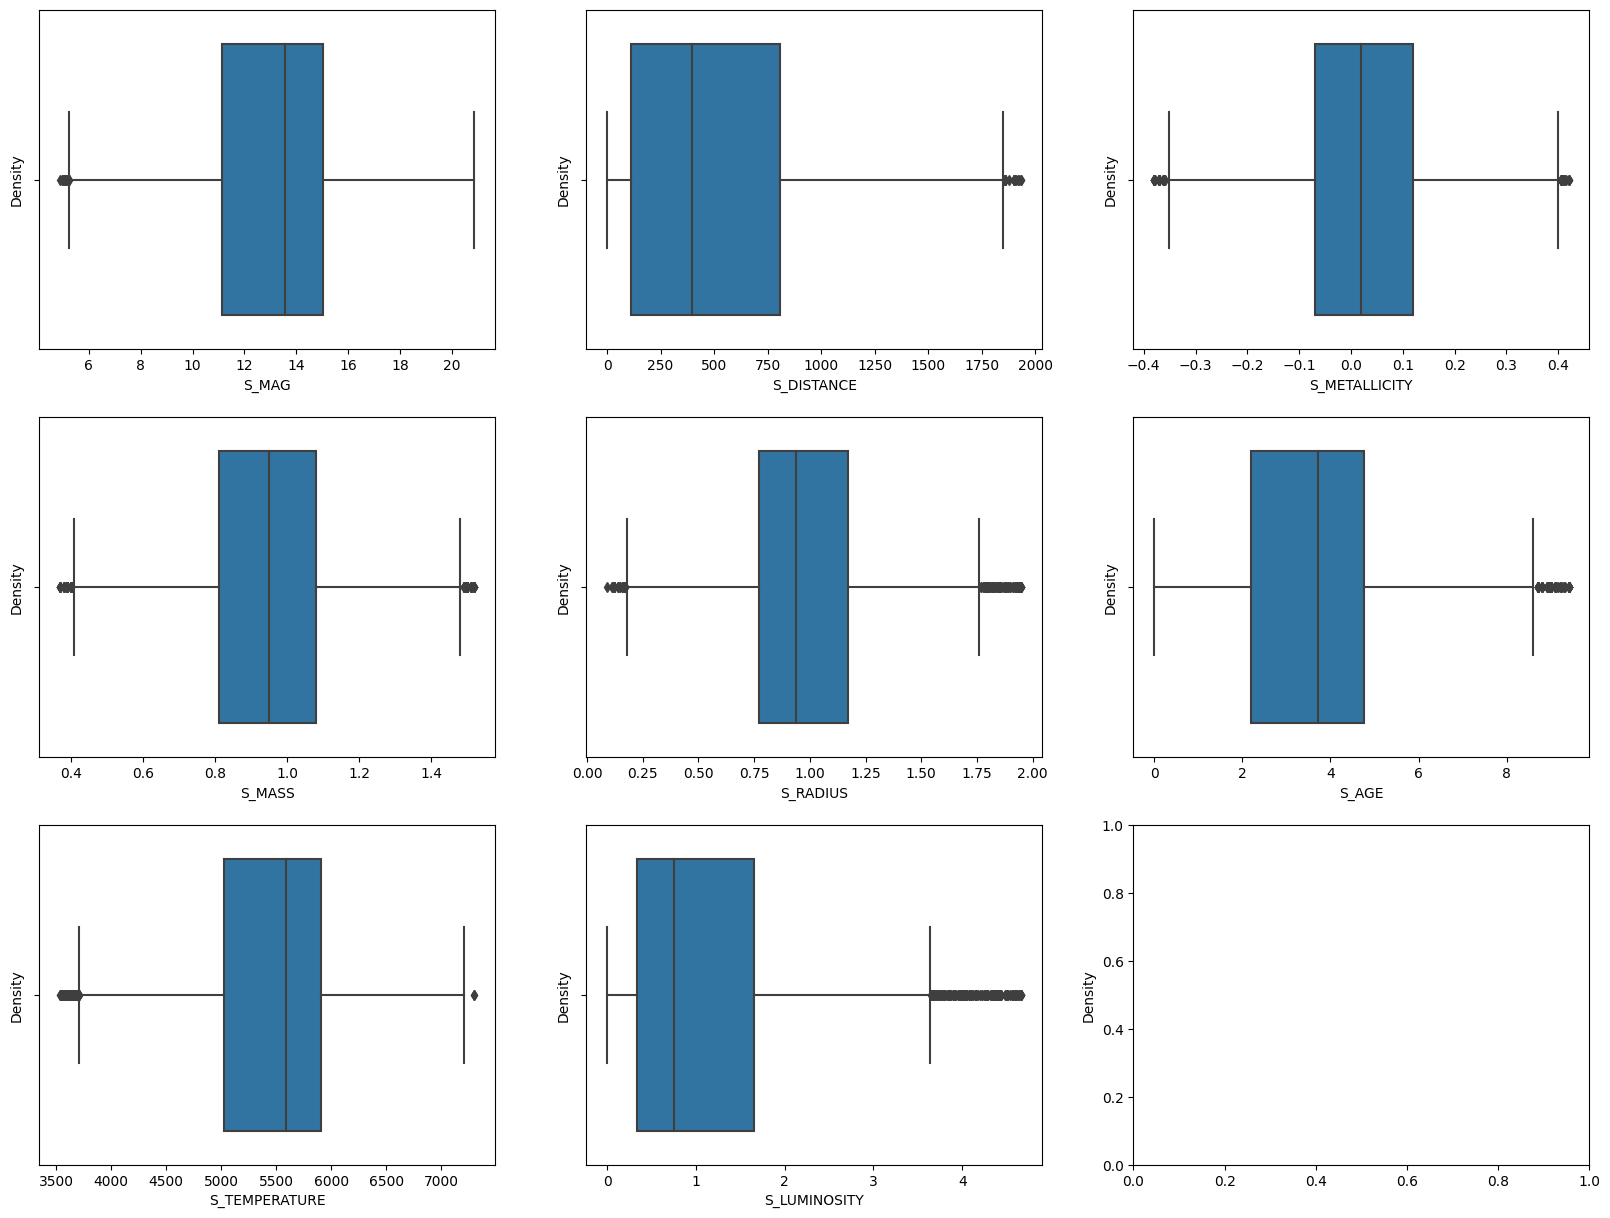

In [36]:
# Histograms of important variables

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(20, 15))
sns.boxplot(data=cleaned_series['df_cleaned_pl_S_MAG'], x='S_MAG', ax=ax1) 
sns.boxplot(data=cleaned_series['df_cleaned_pl_S_DISTANCE'], x='S_DISTANCE', ax=ax2) 
sns.boxplot(data=cleaned_series['df_cleaned_pl_S_METALLICITY'], x='S_METALLICITY', ax=ax3) 
sns.boxplot(data=cleaned_series['df_cleaned_pl_S_MASS'], x='S_MASS', ax=ax4) 
sns.boxplot(data=cleaned_series['df_cleaned_pl_S_RADIUS'], x='S_RADIUS', ax=ax5) 
sns.boxplot(data=cleaned_series['df_cleaned_pl_S_AGE'], x='S_AGE', ax=ax6) 
sns.boxplot(data=cleaned_series['df_cleaned_pl_S_TEMPERATURE'], x='S_TEMPERATURE', ax=ax7) 
sns.boxplot(data=cleaned_series['df_cleaned_pl_S_LUMINOSITY'], x='S_LUMINOSITY', ax=ax8) 

xlabels = ['S_MAG', 'S_DISTANCE', 'S_METALLICITY', 'S_MASS', 'S_RADIUS', 'S_AGE', 'S_TEMPERATURE', 'S_LUMINOSITY']

for ax in fig.get_axes():
    ax.spines['left']
    ax.spines['bottom']
    ax.set_ylabel('Density')
    ax_idx = fig.get_axes().index(ax)
    ax.set_xlabel(xlabels[ax_idx])

plt.tight_layout()
plt.show()

Let's do the same univariate analysis on the AT-HYG dataset

In [37]:
df = pd.read_csv('data/at_hyg_data.csv')

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_5940\2237696649.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/at_hyg_data.csv')


In [30]:
summary_stats(df)

Empirical Statistics



,id,hip,hd,hyg,ra,dec,dist,x0,y0,z0,mag,absmag,rv,ci,host_exoplanet
Mean,1276083.0,59170.404422,200495.440761,59485.242515,12.607915,-3.202711,802.157884,-15.564548,-10.830707,-67.570271,11.174412,2.37396,-1.362696,0.831267,0.000295
Median,1276083.0,59173.0,204078.0,59482.5,12.528393,-4.09798,584.633,-11.814,-15.163,-24.602,11.409,2.409,-1.020035,0.731,0.0
Mode,1,1.0,19923.0,36524.0,5.948864,-88.629213,222.2222,19.994,6.899,42.822,11.819,2.37396,-1.362696,0.831267,False
Variance,542795728282.5,1167745378.961653,9159209403.530046,1179766474.628086,44.72201,1741.352837,5333588.744318,622766.976758,1557322.677078,3793304.555365,1.22025,2.997284,1089.450675,0.339157,0.000295
Standard Deviation,736746.719221,34172.289636,95703.758565,34347.728813,6.687452,41.72952,2309.456374,789.155863,1247.927352,1947.640767,1.104649,1.731267,33.006828,0.582372,0.017174
Skewness,0.0,0.000167,-0.226733,0.000511,-0.076999,0.0694,198.480212,5.736425,47.626077,-200.222588,-1.451835,0.043321,0.129171,0.738109,58.192213
Kurtosis,-1.2,-1.200214,-0.88732,-1.199324,-1.232284,-1.107749,57527.441567,43466.434932,46033.641533,76893.254292,4.055329,0.679067,10.592328,1.105457,3384.336277


General histograms on variables, on 100 000 random points.

IndexError: list index out of range

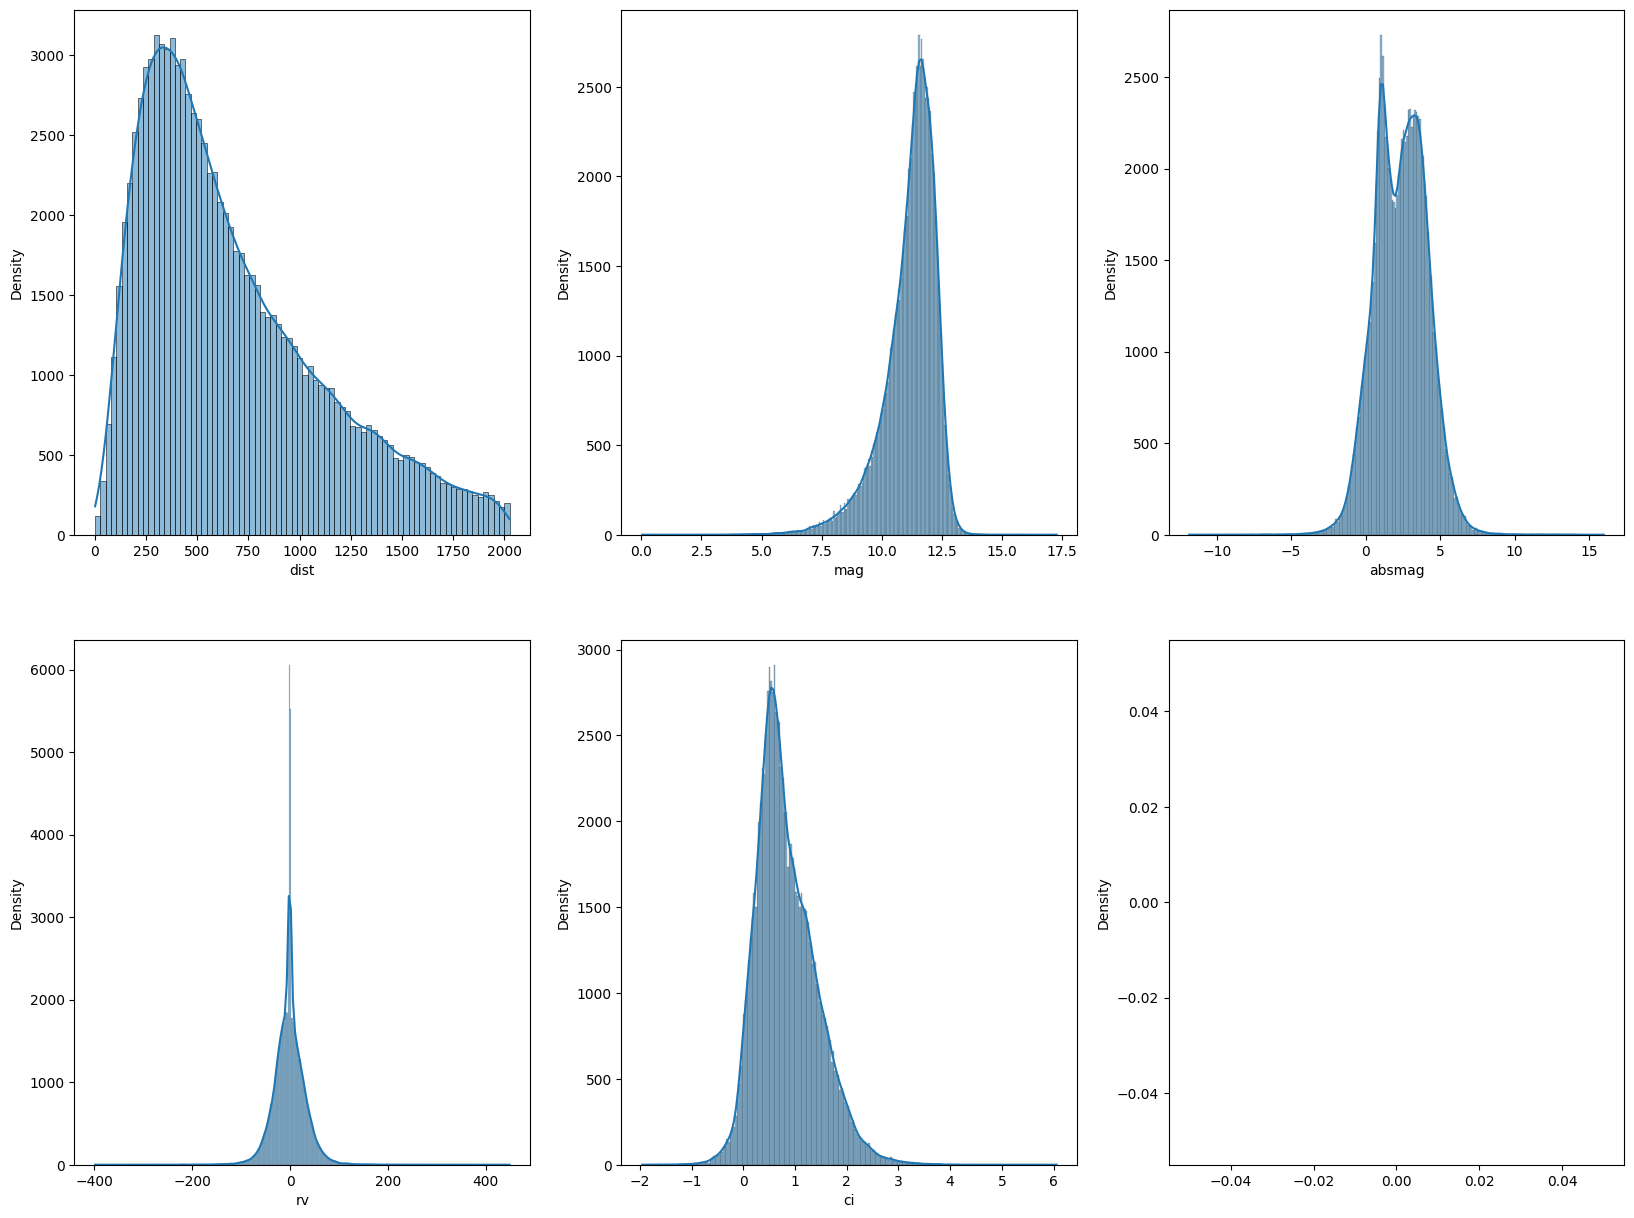

In [38]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20, 15))
sns.histplot(data=outliers_removal(df, 'dist').sample(100000), x='dist', ax=ax1, kde=True) 
sns.histplot(data=df.sample(100000), x='mag', ax=ax2, kde=True) 
sns.histplot(data=df.sample(100000), x='absmag', ax=ax3, kde=True) 
sns.histplot(data=df.sample(100000), x='rv', ax=ax4, kde=True) 
sns.histplot(data=df.sample(100000), x='ci', ax=ax5, kde=True) 
ax6.plot()

xlabels = ['dist', 'mag', 'absmag', 'rv', 'ci']

for ax in fig.get_axes():
    ax.spines['left']
    ax.spines['bottom']
    ax.set_ylabel('Density')
    ax_idx = fig.get_axes().index(ax)
    ax.set_xlabel(xlabels[ax_idx])

plt.tight_layout()
plt.show()

Distributions are not too strange. Particularly, rv and ci are very similar to a normal distribution. Mag seems to be left tailed and absmag seems to be a mixture of two gaussians.

IndexError: list index out of range

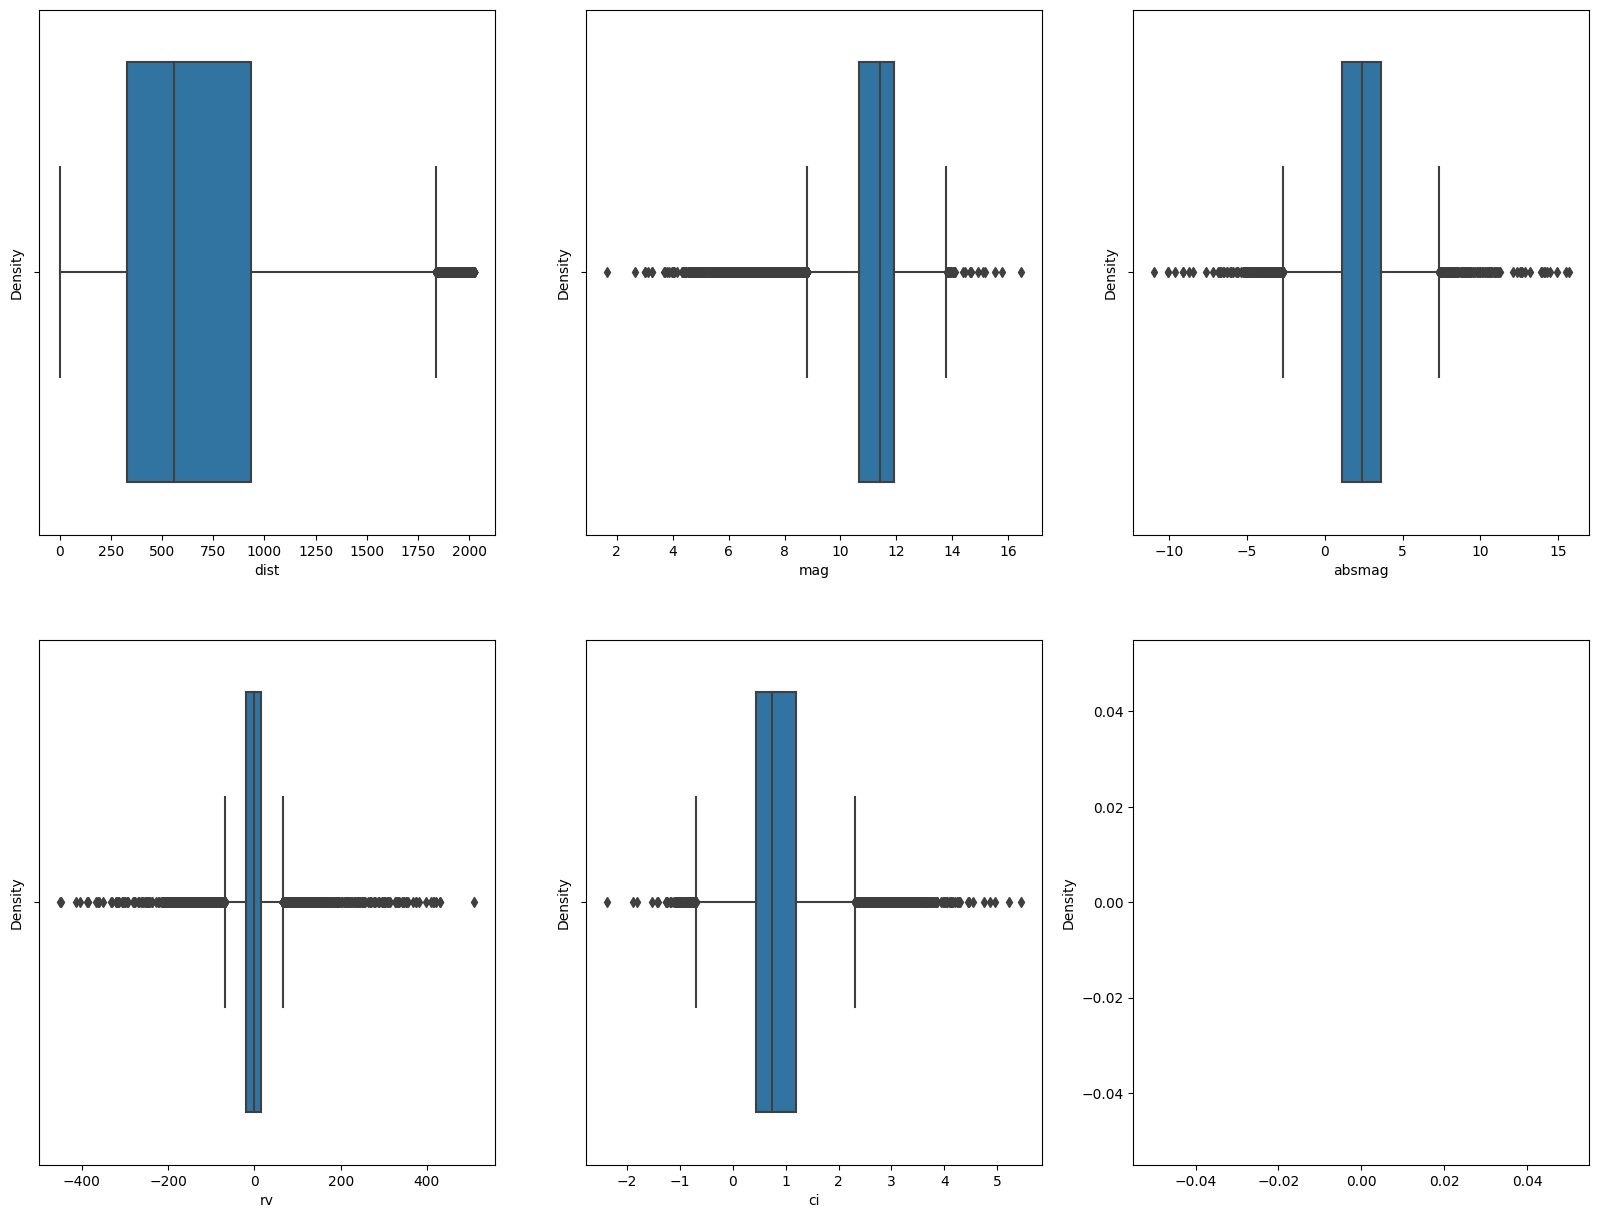

In [39]:
# Boxplots of important variables

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20, 15))
sns.boxplot(data=outliers_removal(df, 'dist').sample(100000), x='dist', ax=ax1) 
sns.boxplot(data=df.sample(100000), x='mag', ax=ax2) 
sns.boxplot(data=df.sample(100000), x='absmag', ax=ax3) 
sns.boxplot(data=df.sample(100000), x='rv', ax=ax4) 
sns.boxplot(data=df.sample(100000), x='ci', ax=ax5) 
ax6.plot()

xlabels = ['dist', 'mag', 'absmag', 'rv', 'ci']

for ax in fig.get_axes():
    ax.spines['left']
    ax.spines['bottom']
    ax.set_ylabel('Density')
    ax_idx = fig.get_axes().index(ax)
    ax.set_xlabel(xlabels[ax_idx])

plt.tight_layout()
plt.show()